In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
size = 1000
x = np.random.normal(loc=0, scale=8, size=size)
y = np.random.normal(loc=0, scale=2, size=size)

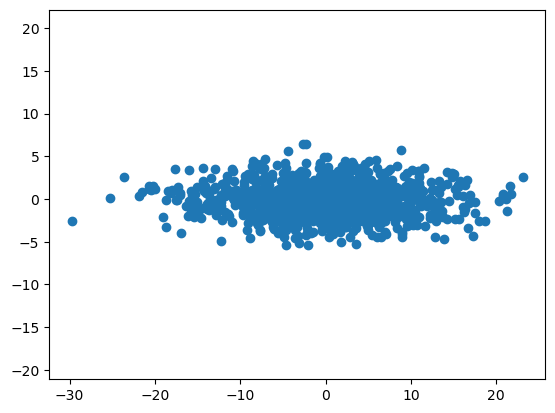

In [6]:
plt.scatter(x, y)
plt.axis('equal')
plt.show()

In [7]:
mean = [0, 0]
cov = [[3, 3], [3, 4]]
size = 500
X = np.random.multivariate_normal(mean=mean, cov=cov, size=size)

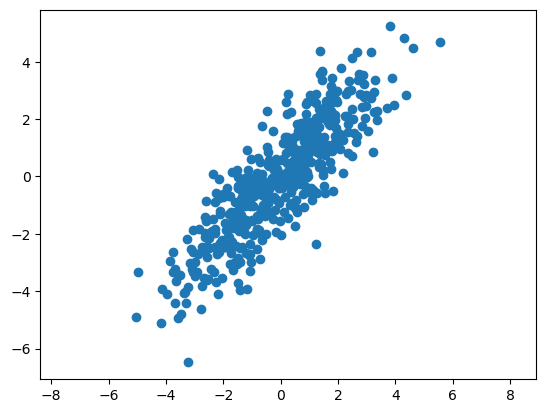

In [8]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [9]:
X

array([[ 1.35806809e+00,  8.07900033e-01],
       [-8.36274186e-01, -1.39369244e+00],
       [ 4.76461050e-01,  2.58710502e-01],
       [ 1.45395147e+00,  3.66109472e+00],
       [ 3.24972630e+00,  2.95738671e+00],
       [-1.71334004e+00, -1.24988637e+00],
       [ 3.62408025e-01,  2.24029797e+00],
       [ 8.72169765e-01,  2.18994469e+00],
       [-3.35191568e+00, -4.05140234e+00],
       [ 3.57730206e-01,  2.76462111e-01],
       [-1.40298173e+00, -4.30971965e-01],
       [-4.92471381e-01,  2.26806020e+00],
       [-1.48500405e+00, -2.82772053e+00],
       [ 1.77952356e+00,  8.85289743e-01],
       [ 1.01183921e+00,  2.83057911e+00],
       [-1.65009970e+00, -1.79430496e+00],
       [-3.69226493e+00, -4.41334141e+00],
       [-4.24002612e-01, -8.58798041e-01],
       [ 1.11529659e+00,  1.71907108e+00],
       [ 1.99585298e+00,  1.30757814e+00],
       [ 9.66168777e-01,  7.65110085e-01],
       [-1.58794581e+00, -2.99695242e+00],
       [-1.98275057e+00, -2.47567296e+00],
       [-9.

## normalización de los datos

In [11]:
np.mean(X, axis=0), np.std(X, axis=0)

(array([-0.05659078, -0.09639093]), array([1.77459649, 1.99514649]))

In [12]:
X_std = (X - np.mean(X, axis=0))/np.std(X, axis=0)

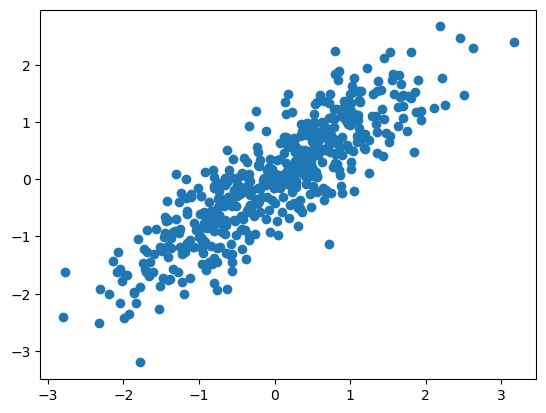

In [13]:
plt.scatter(X_std[:, 0], X_std[:, 1])

# Calculo de la covarianza

In [15]:
X_mean = np.mean(X_std, axis=0)
X_mean

array([-8.43769499e-18,  4.94604357e-17])

In [16]:
cov_matrix = (X_std - X_mean).T.dot((X_std - X_mean))/(X_std.shape[0]-1)
cov_matrix

array([[1.00200401, 0.86363097],
       [0.86363097, 1.00200401]])

In [17]:
np.cov(X_std.T)

array([[1.00200401, 0.86363097],
       [0.86363097, 1.00200401]])

In [18]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals, eig_vecs

(array([0.13837304, 1.86563498]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

# Calculo de valores y vectores propios con la matriz de correlación

In [20]:
corr_matrix = np.corrcoef(X_std.T)
corr_matrix

array([[1.        , 0.86190371],
       [0.86190371, 1.        ]])

In [21]:
eig_vals_corr, eig_vecs_corr = np.linalg.eig(corr_matrix)
eig_vals_corr, eig_vecs_corr

(array([0.13809629, 1.86190371]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

# Singular Value Decomposition

In [23]:
u, s, v = np.linalg.svd(X_std.T)
u

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [25]:
#La longitud de mi vectr es su norma, la norma se calcula así, los cvectores propios siempre deben estar normalizados. 
#Lamda dice qué tan largo es el vector 
# ya que el solo vale 1, el vector unitario nos da las coordenadas del vector.
#El que sean vectores unitarios hace que el peso de la información recaiga en lamda
np.linalg.norm(eig_vecs[0]), np.linalg.norm(eig_vecs[0])

(1.0, 1.0)

In [26]:
np.sum(eig_vals) 

2.0040080160320652

In [27]:
eig_vals

array([0.13837304, 1.86563498])

In [28]:
#Sacar el porcentaje de cada uno de los vectores 
total_sum = np.sum(eig_vals)

val_porc_eig_val_1 = eig_vals[0]/total_sum * 100
val_porc_eig_val_2 = eig_vals[1]/total_sum * 100
val_porc_eig_val_1, val_porc_eig_val_2

(6.904814716502014, 93.095185283498)

In [29]:
#Para ordenar los valores propios de mayor a menor hcaemos
eig_pairs = [(eig_vals[i], eig_vecs[i]) for i in range(len(eig_vals))]
eig_pairs

[(0.13837304041086207, array([-0.70710678, -0.70710678])),
 (1.8656349756212034, array([ 0.70710678, -0.70710678]))]

In [30]:
eig_pairs.sort(reverse=True)
eig_pairs

[(1.8656349756212034, array([ 0.70710678, -0.70710678])),
 (0.13837304041086207, array([-0.70710678, -0.70710678]))]

In [31]:
Total_sum = np.sum(eig_vals)

porc_eig = [eig_val/total_sum * 100 for eig_val, _ in eig_pairs]
cum_porc_eig = np.cumsum(porc_eig)
porc_eig, cum_porc_eig

([93.095185283498, 6.904814716502014], array([ 93.09518528, 100.        ]))

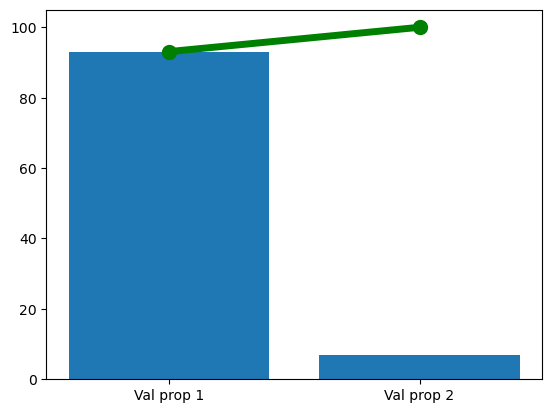

In [32]:
#PLOTS
x =['Val prop 1', 'Val prop 2']
plt.bar(x, porc_eig)
plt.plot(x, cum_porc_eig, '.-', c='green', linewidth=5, markersize=20) 
#Estamos viendo graficamente la longitud porcentual de cada lamda
#La recta de arriba indica hasta donde me permito perder de información.

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2).fit(X_std)
#PCA es nuestra función
#n_components=2 es la reducción de dimensión
#X_std son los datos

In [35]:
pca.components_, pca.explained_variance_ #metodo o función para hacer la reducción de dimensiones.
#Los vectores propios son los componentes principales.

(array([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]]),
 array([1.86563498, 0.13837304]))

CLASE 24/02/2025

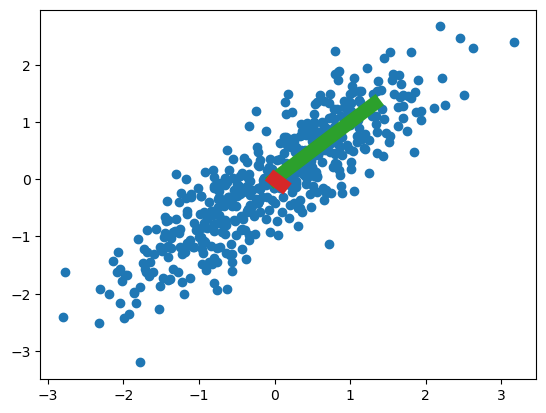

In [45]:
plt.scatter(X_std[:, 0], X_std[:, 1])
for idx, (eig_vec, eig_val) in enumerate(zip(pca.components_,pca.explained_variance_)):
    plt.plot([0, eig_val*eig_vec[0]], [0, eig_val*eig_vec[1]], color = f"C{idx+2}", linewidth=10)
#son los dos vectores propios multiplicados por los valores propios, el verde es el valor propio 1 por el vec 1, el rojo es el CP 2.